<a href="https://colab.research.google.com/github/ggrindstaff/Connectivity/blob/Automated-Earthwork-Detection/Colab_notebooks/berm_id_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
%config InlineBackend.figure_format='retina'
import scipy

In [2]:
# import information about berm characteristics

docID = '1LXr5arGylnP24vHXe_KuvUvLhoKwrgFx1eKK3SLW1R4'
sheetID = '0' 
berm_data = pd.read_csv('https://docs.google.com/spreadsheets/d/' +
                   docID +
                   '/export?gid=' +
                   sheetID+ '&format=csv')
berm_data = berm_data[ (~berm_data.max_berm_pixel_value.isna())]

In [3]:
# calculate overall success
TP = len(berm_data[berm_data.detected=='Y'])
FP = 6

PC = TP/(TP+FP)
DT = TP/len(berm_data)

PC,DT

(0.9166666666666666, 0.6407766990291263)

0.6857575757575756 0.1905405405405405


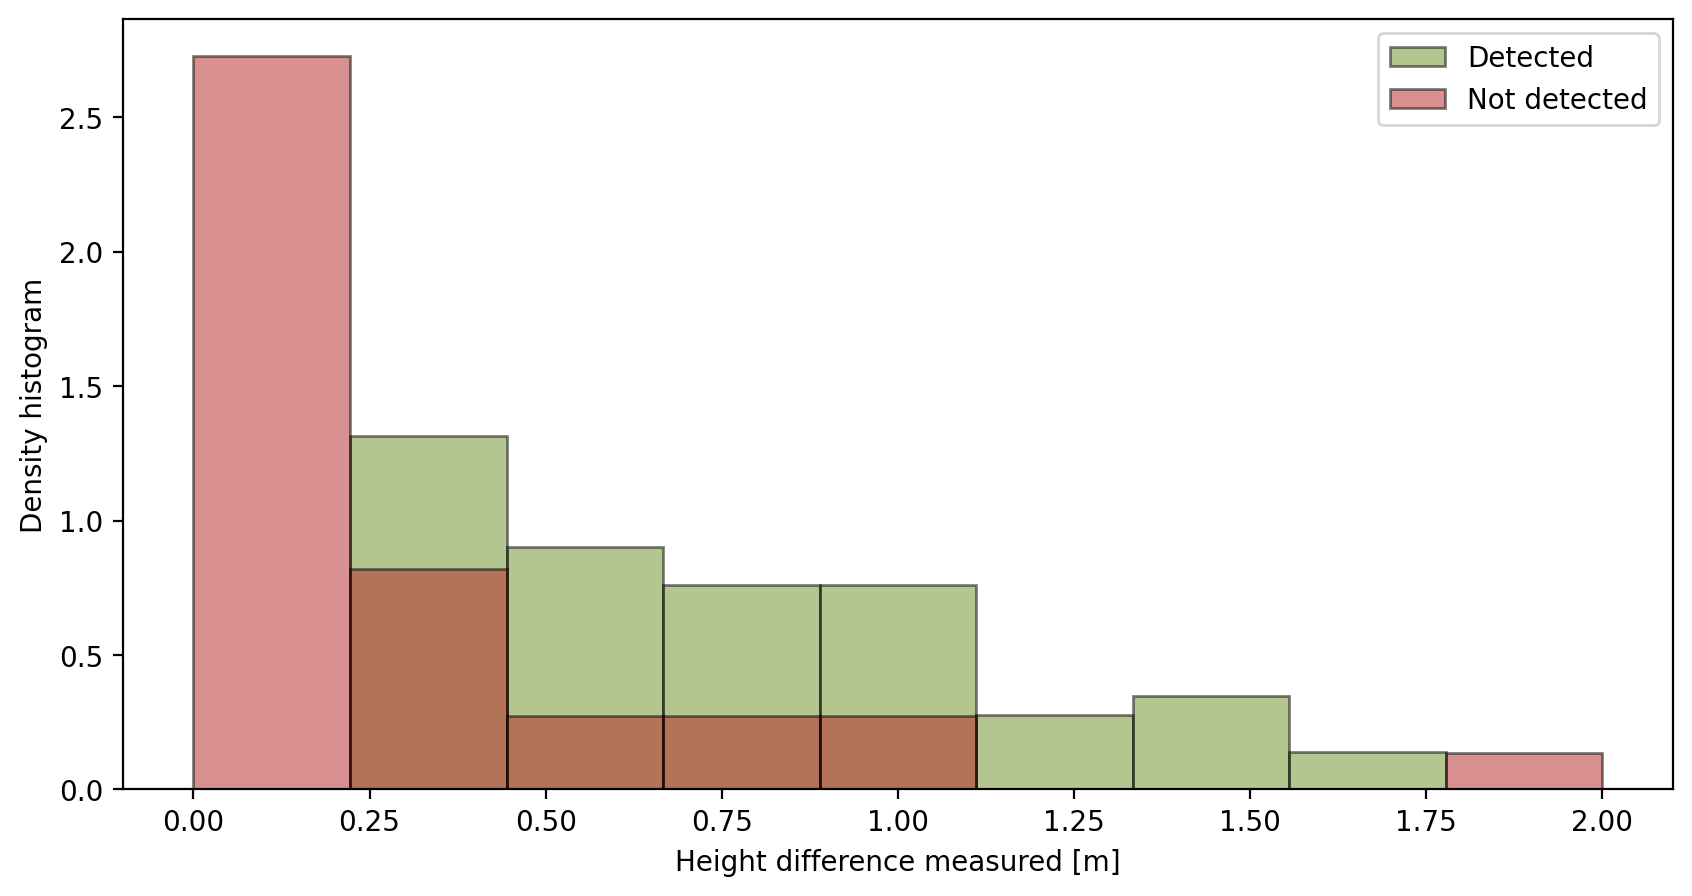

In [4]:
# fig,axs = plt.subplots(3,3, figsize = (15,15))
fig,ax = plt.subplots(1,figsize = (10,5))


detected = berm_data[(berm_data.detected=='Y') ]
nodetect = berm_data[(berm_data.detected=='N') ]



col = 'height_diffs_m'
# ax = axs[0,0]
bins = np.linspace(0,2,10)
ax.hist(detected[col],bins,alpha=0.5,edgecolor = 'k',
        facecolor = 'olivedrab', density=True, label = 'Detected')
ax.hist(nodetect[col],bins,alpha=0.5,edgecolor = 'k',
        facecolor = 'firebrick', density = True, label = 'Not detected')
ax.set_xlabel('Height difference measured [m]')
ax.set_ylabel('Density histogram')
ax.legend()
print(detected[col].mean(), nodetect[col].mean())

In [5]:
col = 'height_diffs_m'
scipy.stats.ttest_ind(detected[col], nodetect[col])

Ttest_indResult(statistic=3.9295183052799043, pvalue=0.00015597507725907312)

In [6]:
detected[col].mean(), nodetect[col].mean()

(0.6857575757575756, 0.1905405405405405)

In [8]:
detected[col].median(), nodetect[col].median()

(0.6499999999999999, 0.2)

In [7]:
nodetect['error_type'] = np.where(nodetect.height_diffs_m<=0,'A',np.nan)
nodetect['error_type'] = np.where(((nodetect.note!='line') & (nodetect.height_diffs_m>.3)) | (nodetect.index==108),'B',nodetect.error_type)
nodetect['error_type'] = np.where((nodetect['state of repair']=='breach'),'C', nodetect.error_type)
nodetect['error_type'] = np.where((nodetect.error_type=='nan') & (nodetect.height_diffs_m<0.4),'D',nodetect.error_type)
nodetect['error_type'] = np.where(nodetect.index==33,'off-contour',nodetect.error_type)

<ipython-input-7-818e827af0ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodetect['error_type'] = np.where(nodetect.height_diffs_m<=0,'A',np.nan)
<ipython-input-7-818e827af0ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodetect['error_type'] = np.where(((nodetect.note!='line') & (nodetect.height_diffs_m>.3)) | (nodetect.index==108),'B',nodetect.error_type)
<ipython-input-7-818e827af0ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo